In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# suppose we have received the following data from some sensor
data_x = np.linspace(1.0, 10.0, 100)[:, np.newaxis]
data_y = np.sin(data_x) + 0.1 * np.power(data_x, 2) + 0.5 * np.random.randn(100, 1)

### fit a polynomial of order 6


In [3]:
data_x.shape

(100, 1)

In [4]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

In [5]:
Input=[('polynomial'
        ,PolynomialFeatures(degree=6)),('modal',LinearRegression())]
pipe=Pipeline(Input)
pipe.fit(data_x.reshape(-1,1),data_y.reshape(-1,1))

Pipeline(steps=[('polynomial', PolynomialFeatures(degree=6)),
                ('modal', LinearRegression())])

In [6]:
poly_pred=pipe.predict(data_x.reshape(-1,1))

In [7]:
sorted_zip=sorted(zip(data_x,data_y,poly_pred))
x_poly,y_poly,poly_pred=zip(*sorted_zip)

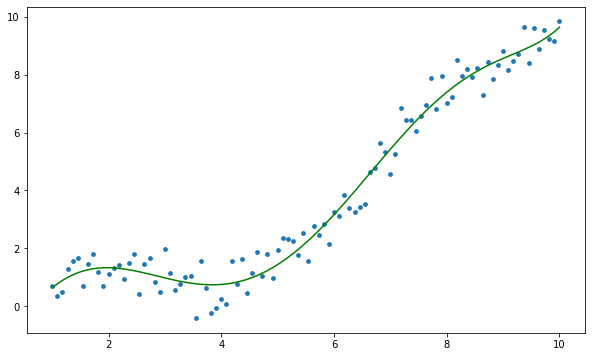

In [8]:
plt.figure(figsize=(10,6))
plt.scatter(data_x,data_y,s=14)
plt.plot(x_poly,poly_pred,color='g')

In [9]:
# Implement gradient computation and theta update 
def gradient_descent(X, y, theta, alpha):
    m, n = X.shape
    theta = np.zeros(n)
    costs = np.zeros(1000)
    for i in range(1000):
        grad=np.zeros(n)
        for j in range(m):
            y_hat=X[j]@theta
            costs[i]+=1/m*(y_hat-y[j])**2
            for k in range(n):
                grad[k]+=1/m*2*(y_hat-y[j])*X[j,k]
        theta -=alpha*grad
    return theta,costs

In [10]:
X= np.hstack((
    np.ones((100,1)),
    data_x,
    (data_x[:,0]**2).reshape((100, 1)),
    (data_x[:,0]**3).reshape((100, 1)),
    (data_x[:,0]**4).reshape((100, 1)),
    (data_x[:,0]**5).reshape((100, 1)),
    (data_x[:,0]**6).reshape((100, 1))
))

In [11]:
# Call stochastic gradient descent in the main loop
n = X.shape[0]
LR = 0.00000000001
sample_size = 10
epochs = 1000
theta = np.zeros(X.shape[1]).reshape(-1,1)
costs = []
for i in range(epochs):
    idx = np.random.choice(n, sample_size, replace=False)
    x_sample=X[idx]
    y_sample=data_y[idx]
    y_hat=x_sample@theta - y_sample
    grad=(2/sample_size)*x_sample.T@((x_sample@theta)-y_sample)
    theta-=LR*grad

In [12]:
# predict y_hat using test_x and theta 
# plot x vs y in blue
# plot x vs y_hat in red

In [13]:
y_hat=X@theta

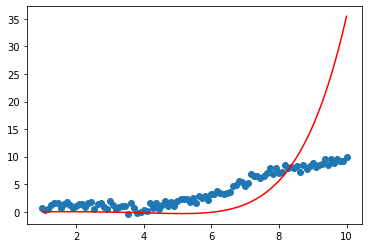

In [14]:
plt.plot(data_x,y_hat,'r')
plt.scatter(data_x,data_y)